Ce projet applique la méthodologie CRISP-DM afin de mener une analyse complète de segmentation non supervisée sur la dataset HeartDiseaseTrain-Test.csv issue de Kaggle comme demandé.(inclus dans le compte rendu). Cette base contient diverses <br> caractéristiques médicales de patients, telles que l’âge, la pression artérielle, le cholestérol, et d'autres mesures cliniques importantes.

Voici comment les étapes de CRISP-DM seront suivies dans notre projet :

**1/Collection et Compréhension des données** : Nous étudions le contexte médical des données pour identifier les indicateurs utiles à la segmentation, en nous concentrant uniquement sur les caractéristiques des patients sans utiliser le feature  *target*.

**2/Analyse des données** : Une analyse exploratoire nous permettra de mieux comprendre les distributions, les types de variables, les valeurs manquantes, et les éventuelles anomalies dans les données.

**3/Prétraitement des données** : Nous convertissons les variables catégorielles , afin de préparer une base fiable pour l’analyse.

**4/Transformation des données** : Des transformations supplémentaires comme la "MinMaxScaling" pour améliorer la qualité du clustering.

**5/Modélisation** : Deux techniques de classification non supervisée seront utilisées : **K-Means** et **AGNES**, pour regrouper les patients selon leurs similarités médicales.

**6/Comparaison et interprétation:** : Nous **comparons** les performances des modèles, analysons les résultats des clusters, et interprétons leur signification médicale potentielle.

Ce notebook documente toutes ces 6 étapes à travers du code et des visualisations pour mettre en lumière les segments de patients obtenus.



________________________________________________________________________________________________

0. Compréhension du domaine + Compréhension des données (1ère et 2ème étape CRISP-DM)

nous avons choisi ce jeu de données ([Lien](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)) réalisé par ketan gangal , en raison de sa grande facilité d'utilisation dans kaggle, de sa richesse et de sa variété. <br>



1. Collection et compréhension de données (3éme étape CRISP-DM)

In [2]:
import pandas as pd

df = pd.read_csv('HeartDiseaseTrain-Test.csv')
print(df.shape)
df.head()


(1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


Suppression de la colonne target pour l'apprentissage non supervisé


In [3]:
df.drop('target', axis=1, inplace=True)
print(df.shape)
df.head()

(1025, 13)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect


Collection de l'information sur notre dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

2. Analyse de données:


 Vérification des valeurs nulles dans chaque colonne

In [5]:
for col in df.columns:
    temp = df[col].isnull().sum()
    print(f'Column {col} contains {temp} null values.')

Column age contains 0 null values.
Column sex contains 0 null values.
Column chest_pain_type contains 0 null values.
Column resting_blood_pressure contains 0 null values.
Column cholestoral contains 0 null values.
Column fasting_blood_sugar contains 0 null values.
Column rest_ecg contains 0 null values.
Column Max_heart_rate contains 0 null values.
Column exercise_induced_angina contains 0 null values.
Column oldpeak contains 0 null values.
Column slope contains 0 null values.
Column vessels_colored_by_flourosopy contains 0 null values.
Column thalassemia contains 0 null values.


Vérification des features catégorielles uniques

In [6]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: sex
sex
Male      713
Female    312
Name: count, dtype: int64

Column: chest_pain_type
chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

Column: fasting_blood_sugar
fasting_blood_sugar
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: count, dtype: int64

Column: rest_ecg
rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64

Column: exercise_induced_angina
exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64

Column: slope
slope
Flat           482
Downsloping    469
Upsloping       74
Name: count, dtype: int64

Column: vessels_colored_by_flourosopy
vessels_colored_by_flourosopy
Zero     578
One      226
Two      134
Three     69
Four      18
Name: count, dtype: int64

Column: thalassemia
thalassemia
Fixed Defect         544
Reversable Defect    410
Normal            

3.Prétraitement de données:

Utilisation du "Label Encoding" pour les features ordinales et du "One-Hot encoding" pour les features nominales  

In [7]:
from sklearn.preprocessing import OneHotEncoder
ordinal_mappings = {
    'slope': {
        'Upsloping': 0,
        'Flat': 1,
        'Downsloping': 2
    },
    'vessels_colored_by_flourosopy': {
        'Zero': 0,
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4
    },
    'chest_pain_type': {
        'Typical angina': 0,
        'Atypical angina': 1,
        'Non-anginal pain': 2,
        'Asymptomatic': 3
    },
    'rest_ecg': {
        'Normal': 0,
        'ST-T wave abnormality': 1,
        'Left ventricular hypertrophy': 2
    },
    'thalassemia': {
        'No':0,
        'Normal': 1,
        'Reversable Defect': 2,
        'Fixed Defect': 3
    }
}




for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

nominal_cols = ['sex', 'fasting_blood_sugar',  'exercise_induced_angina']



encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[nominal_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,
                         columns=encoder.get_feature_names_out(nominal_cols))


df_encoded = pd.concat([df.drop(nominal_cols, axis=1), one_hot_df], axis=1)
df_encoded.head()


,age,chest_pain_type,resting_blood_pressure,cholestoral,rest_ecg,Max_heart_rate,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,sex_Male,fasting_blood_sugar_Lower than 120 mg/ml,exercise_induced_angina_Yes
0,52,0,125,212,1,168,1.0,2,2,2,1.0,1.0,0.0
1,53,0,140,203,0,155,3.1,0,0,2,1.0,0.0,1.0
2,70,0,145,174,1,125,2.6,0,0,2,1.0,1.0,1.0
3,61,0,148,203,1,161,0.0,2,1,2,1.0,1.0,0.0
4,62,0,138,294,1,106,1.9,1,3,3,0.0,0.0,0.0


4. Transformation de données :

Utilisation de MinMax pour le "Scaling" des features

In [8]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


print(df_encoded.head())

        age  chest_pain_type  resting_blood_pressure  cholestoral  rest_ecg  \
0  0.479167              0.0                0.292453     0.196347       0.5   
1  0.500000              0.0                0.433962     0.175799       0.0   
2  0.854167              0.0                0.481132     0.109589       0.5   
3  0.666667              0.0                0.509434     0.175799       0.5   
4  0.687500              0.0                0.415094     0.383562       0.5   

   Max_heart_rate   oldpeak  slope  vessels_colored_by_flourosopy  \
0        0.740458  0.161290    1.0                           0.50   
1        0.641221  0.500000    0.0                           0.00   
2        0.412214  0.419355    0.0                           0.00   
3        0.687023  0.000000    1.0                           0.25   
4        0.267176  0.306452    0.5                           0.75   

   thalassemia  sex_Male  fasting_blood_sugar_Lower than 120 mg/ml  \
0     0.666667       1.0                

5.Modélisation : K-Means clustering

Utilistation de "Silhouette score" pour savoir le nombre optimal k de clusters nécessaire pour la segmentation

Silhouette Scores: [np.float64(0.22023414557094256), np.float64(0.2584362120762753), np.float64(0.21700088618345229), np.float64(0.24396111788118063), np.float64(0.22824824113102768), np.float64(0.2145221163187211), np.float64(0.2410388135910746), np.float64(0.20597199944813263), np.float64(0.2208730597597853)]


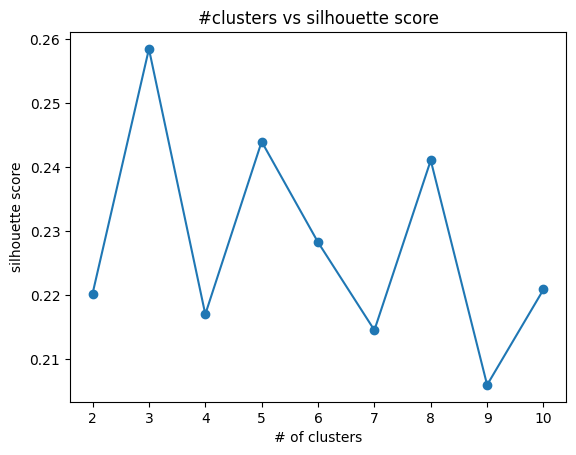

Optimal number of clusters (k): 3


In [9]:
from sklearn import metrics, cluster
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

cluster_range = range(2, 11)

silhouette_scores = []


for k in cluster_range:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, km.labels_)
    silhouette_scores.append(silhouette_avg)

print("Silhouette Scores:", silhouette_scores)


plt.title("#clusters vs silhouette score")
plt.xlabel("# of clusters")
plt.ylabel("silhouette score")
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.show()


optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")

Faire le fitting avec la valeur K optimale

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df_encoded)

Agnes: meme technique utilisée dans le modèle K-means

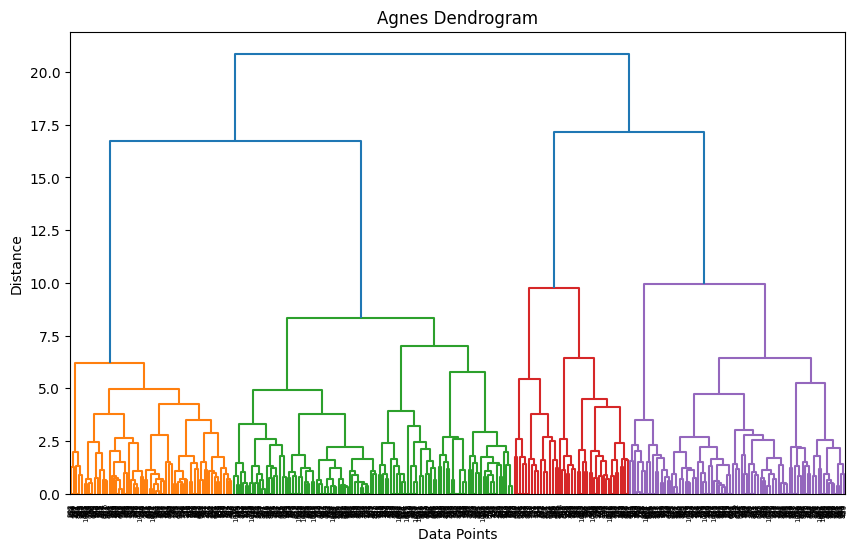

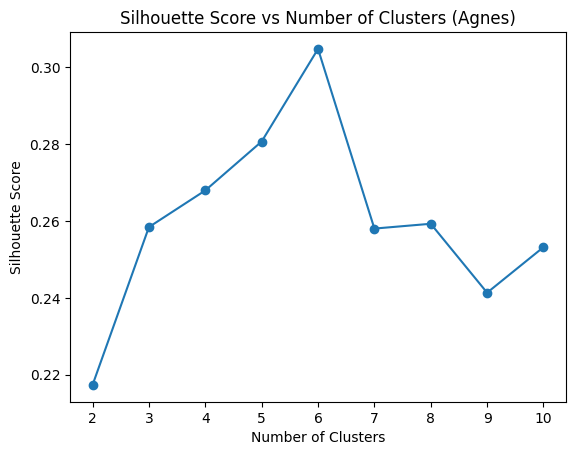

Optimal number of clusters: 6


In [11]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
import matplotlib.pyplot as plt


cluster_range = range(2, 11)

silhouette_scores = []


Z = linkage(df_encoded, method='ward', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram = dendrogram(Z)
plt.title('Agnes Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


for num_clusters in cluster_range:
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Agnes)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_num_clusters}")

In [12]:
from sklearn.cluster import AgglomerativeClustering


agnes = AgglomerativeClustering(n_clusters=optimal_num_clusters, metric='euclidean', linkage='ward')
df['agnes_cluster'] = agnes.fit_predict(df_encoded)

6. Comparaison et interprétation:

In [13]:
print(f"K-Means Silhouette Score: {silhouette_score(df_encoded, df['kmeans_cluster']):.3f}")
print(f"AGNES Silhouette Score: {silhouette_score(df_encoded, df['agnes_cluster']):.3f}")

K-Means Silhouette Score: 0.264
AGNES Silhouette Score: 0.305


Nous pouvons voir qu'Agnès a un score de silhouette plus élevé que K-means

Le nombre de chaque patient dans chaque cluster:

In [14]:
print("\nK-Means Cluster Sizes:")
print(df['kmeans_cluster'].value_counts())

print("\nAGNES Cluster Sizes:")
print(df['agnes_cluster'].value_counts())


K-Means Cluster Sizes:
kmeans_cluster
2    442
0    342
1    241
Name: count, dtype: int64

AGNES Cluster Sizes:
agnes_cluster
0    372
2    230
3    215
1     93
5     60
4     55
Name: count, dtype: int64


La moyenne de chaque feature dans chaque cluster:

In [15]:

df_encoded['kmeans_cluster'] = df['kmeans_cluster']


df_encoded['agnes_cluster'] = df['agnes_cluster']

print("\nK-Means Cluster Profiles:")
print(df_encoded.groupby('kmeans_cluster').mean())

print("\nAGNES Cluster Profiles:")
print(df_encoded.groupby('agnes_cluster').mean())


K-Means Cluster Profiles:
                     age  chest_pain_type  resting_blood_pressure  \
kmeans_cluster                                                      
0               0.555921         0.115984                0.370766   
1               0.553769         0.417704                0.337861   
2               0.496701         0.411011                0.351746   

                cholestoral  rest_ecg  Max_heart_rate   oldpeak     slope  \
kmeans_cluster                                                              
0                  0.284767  0.242690        0.500223  0.257734  0.573099   
1                  0.301607  0.278008        0.622502  0.127225  0.755187   
2                  0.250553  0.274887        0.656333  0.131988  0.751131   

                vessels_colored_by_flourosopy  thalassemia  sex_Male  \
kmeans_cluster                                                         
0                                    0.229532     0.729045  0.792398   
1                        

Les graphiques PCA fournissent une visualisation des affectations de clusters dans un espace de dimension réduite, montrant des clusters visuellement distincts pour les deux méthodes


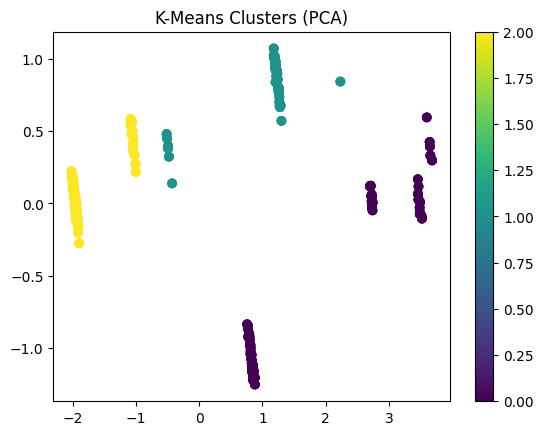

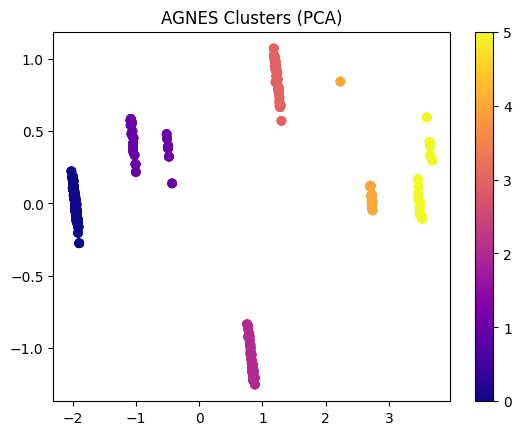

In [16]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['kmeans_cluster'], cmap='viridis', label='K-Means')
plt.title('K-Means Clusters (PCA)')
plt.colorbar()
plt.show()


plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['agnes_cluster'], cmap='plasma', label='AGNES')
plt.title('AGNES Clusters (PCA)')
plt.colorbar()
plt.show()